<a href="https://colab.research.google.com/github/Alphaomegainfinity/Project-4_Car_Price_Predictor/blob/main/car_price_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import and Cleaning Data**

In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import json
import pickle

In [3]:
# Import our input dataset
car_df = pd.read_csv('https://raw.githubusercontent.com/Alphaomegainfinity/Project-4_Car_Price_Predictor/main/Resources/Car%20details%20v3.csv')
car_df.head()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Check shape of dataframe
car_df.shape

(8128, 13)

In [5]:
# Check info of dataframe
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [6]:
# Drop unwanted columns 
car_df.drop(['name', 'torque', 'max_power', 'mileage'], axis=1, inplace=True)
car_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248 CC,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498 CC,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497 CC,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396 CC,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298 CC,5.0
...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,1197 CC,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,1493 CC,5.0
8125,2009,382000,120000,Diesel,Individual,Manual,First Owner,1248 CC,5.0
8126,2013,290000,25000,Diesel,Individual,Manual,First Owner,1396 CC,5.0


In [7]:
# work for potentially adding in engine size and fuel consumption

car_df['engine'] = car_df['engine'].str.rsplit(' ', n=1).str.get(0)
car_df.rename(columns={'engine':'engine(CC)'}, inplace=True)
car_df['engine(CC)'] = car_df['engine(CC)'].astype(float)

In [8]:
engine_bin = [1,2,3,4]
car_df['engine(CC)_binning'] = pd.cut(car_df['engine(CC)'], [1000, 1999, 2999, 3999, 4000], labels = engine_bin)
car_df.head(200)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine(CC),seats,engine(CC)_binning
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,1248.0,5.0,1
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,1498.0,5.0,1
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,1497.0,5.0,1
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,1396.0,5.0,1
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,1298.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...
195,2005,65000,86000,Petrol,Individual,Manual,First Owner,1341.0,5.0,1
196,2020,720000,5000,Petrol,Individual,Manual,First Owner,1197.0,5.0,1
197,2017,800000,37000,Diesel,Individual,Manual,First Owner,1248.0,5.0,1
198,2019,520000,14000,Petrol,Individual,Manual,First Owner,1199.0,5.0,1


In [9]:
car_df['seats'] = car_df['seats'].astype(str)
car_df['engine(CC)_binning'] = car_df['engine(CC)_binning'].astype(str)

In [10]:
car_df.dropna(inplace=True)

In [11]:
car_df = pd.get_dummies(car_df)
car_df.head()

,year,selling_price,km_driven,engine(CC),fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,...,seats_4.0,seats_5.0,seats_6.0,seats_7.0,seats_8.0,seats_9.0,engine(CC)_binning_1,engine(CC)_binning_2,engine(CC)_binning_3,engine(CC)_binning_nan
0,2014,450000,145500,1248.0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,2014,370000,120000,1498.0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,2006,158000,140000,1497.0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
3,2010,225000,127000,1396.0,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
4,2007,130000,120000,1298.0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0


In [12]:
#car_df.to_csv("carcleandf.csv", sep='\t')

## **Compile, Train and Evaluate the Model**

In [13]:
# Install keras_tuner
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 KB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 26.4 MB/s eta 0:00:00


In [14]:
# Import dependencies

import sklearn as skl
import keras_tuner as kt

In [15]:
# Split our preprocessed data into our features and target arrays

y = car_df["seller_type_Individual"]
X = car_df.drop(["seller_type_Individual", "seller_type_Dealer", "engine(CC)"], axis=1)

[1.06959985e-01 2.71316146e-01 3.00179427e-01 4.52783485e-04
 5.77093691e-03 1.31901954e-04 5.91718566e-03 1.20706566e-01
 5.43404530e-02 6.10097708e-02 2.33958736e-02 1.03888031e-03
 1.06886414e-02 1.50007078e-03 4.64551425e-03 7.75599094e-05
 5.22006470e-06 3.53560880e-05 7.42003576e-04 6.69353236e-03
 6.14893558e-04 4.93042241e-03 1.29780724e-03 2.84555398e-04
 5.63351812e-03 5.49175959e-03 1.70423900e-03 4.43499600e-03]


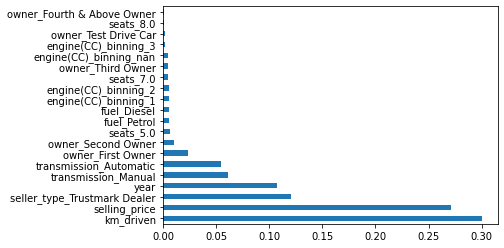

In [16]:
# Checking which feature is important to the target:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
important_feature = ExtraTreesClassifier()
important_feature.fit(X,y)
print(important_feature.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(important_feature.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [17]:
# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify =y) 

In [18]:
# Create a StandardScaler instances
scaler = skl.preprocessing.StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
# Checking the number of feature:

number_input_feature = X_train.shape[1]
number_input_feature

28

In [20]:
# Create a method that creates a new Sequential model with hyperparameter options

def create_model(hp):
    nn_model = tf.keras.models.Sequential()

# Allow kerastuner to decide which activation function to use in hidden layers

    activation = hp. Choice('activation',['relu','tanh', 'sigmoid'])

# Allow kerastuner to decide number of neurons in first layer

    nn_model.add(tf.keras.layers.Dense(units = hp.Int ('first_units', min_value = 1, max_value = 200, step=2), activation = activation, input_dim = number_input_feature))

# Allow kerastuner to decide number of hidden layers and neurons in hidden layers

    for i in range (hp.Int ('num_layers', 1,6)):
        nn_model.add (tf.keras.layers.Dense(units = hp. Int('units_' + str(i), min_value = 1, max_value =200, step=2), activation = activation))

# Output layer

    nn_model.add (tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# Compile the model

    nn_model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics= ["accuracy"])

    return nn_model

In [21]:
# Applying Hyperband

tuner = kt.Hyperband (create_model, objective= "val_accuracy", max_epochs= 100, hyperband_iterations= 2)

In [22]:
# Run the kerastuner seach for best hyperparameters
tuner.search(X_train_scaled, y_train, epochs =100, validation_data = (X_test_scaled, y_test))

Trial 146 Complete [00h 00m 21s]
val_accuracy: 0.9049064517021179

Best val_accuracy So Far: 0.9049064517021179
Total elapsed time: 00h 10m 11s

Search: Running Trial #147

Value             |Best Value So Far |Hyperparameter
relu              |relu              |activation
29                |29                |first_units
4                 |4                 |num_layers
179               |179               |units_0
181               |181               |units_1
61                |61                |units_2
43                |43                |units_3
115               |115               |units_4
141               |141               |units_5
100               |34                |tuner/epochs
34                |12                |tuner/initial_epoch
4                 |4                 |tuner/bracket
4                 |3                 |tuner/round
0145              |0134              |tuner/trial_id

Epoch 35/100
186/186 [==============================] - 1s 4ms/step - loss: 0.3420 - 

KeyboardInterrupt: ignored

In [23]:
# Get best model hyperparmeters

best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 29,
 'num_layers': 4,
 'units_0': 179,
 'units_1': 181,
 'units_2': 61,
 'units_3': 43,
 'units_4': 115,
 'units_5': 141,
 'tuner/epochs': 34,
 'tuner/initial_epoch': 12,
 'tuner/bracket': 4,
 'tuner/round': 3,
 'tuner/trial_id': '0134'}

In [24]:
# Evaluate best model against full test data 

best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate (X_test_scaled, y_test, verbose =2)
print (f"Loss: {model_loss}, Accuracy: {model_accuracy}")

62/62 - 0s - loss: 0.2895 - accuracy: 0.9049 - 329ms/epoch - 5ms/step
Loss: 0.2894836366176605, Accuracy: 0.9049064517021179


In [34]:
# Export our model to HDF5 and JSON file

best_model.save("Output/car_price_prediction.h5")
best_model.save_weights ("Output/car_price_prediction_weights.h5")
json_model = best_model.to_json()
with open ("Output/car_price_prediction.json", "w") as json_file:
    json_file.write (json_model)

## **Deploy Model**

In [27]:
# An instance of the linear-learner predictor is created

from tensorflow.keras.models import load_model
deploy_model = load_model("Output/car_price_prediction.h5")

# Show the model:
deploy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 29)                841       
                                                                 
 dense_1 (Dense)             (None, 179)               5370      
                                                                 
 dense_2 (Dense)             (None, 181)               32580     
                                                                 
 dense_3 (Dense)             (None, 61)                11102     
                                                                 
 dense_4 (Dense)             (None, 43)                2666      
                                                                 
 dense_5 (Dense)             (None, 1)                 44        
                                                                 
Total params: 52,603
Trainable params: 52,603
Non-traina

## **Model Evaluation**

In [ ]:
# # Plotting predicted Vs. actual values
# plt.plot(np.array(y_test), label="actual")
# plt.plot(y_predictions, label="predict")
# plt.legend()
# plt.show()

In [ ]:
# # Calculating the RMSE and R2 scores
# rmse = np.sqrt(mean_squared_error(y_test, y_predictions))
# r2 = r2_score(y_test, y_predictions)

# print(f"RMSE: {rmse}")
# print(f"R2 score: {r2}")

In [42]:
# load json and create model
from keras.models import load_model


json_file = open('Output/car_price_prediction.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = tf.keras.models.model_from_json(loaded_model_json)

# load weights into new model

loaded_model.load_weights("Output/car_price_prediction_weights.h5")
print("Loaded model from disk")

# evaluate loaded model on test data 
# Define X_test & Y_test data first

loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print ("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 83.00%
